## Question 4

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
url = 'https://www.worldometers.info/coronavirus/'
response = requests.get(url)

In [6]:
if response.status_code == 200:
    soup = BeautifulSoup(response.content, 'html.parser')
    table = soup.find('table', id='main_table_countries_today')
    rows = table.tbody.find_all('tr')
    columns = ['Country', 'Continent', 'Population', 'TotalCases', 'NewCases',
               'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases']
    data = []
    for row in rows:
        cols = row.find_all('td')
        cols = [col.text.strip() for col in cols]
        if len(cols) > 12:
            country_data = [cols[1],cols[15],cols[14],cols[2],cols[3],cols[4],cols[5],cols[6],cols[7],cols[8]]
            data.append(country_data)
    df = pd.DataFrame(data, columns=columns)
df.head()

,Country,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases
0,North America,North America,,"131,889,132",,"1,695,941",,"127,665,129",+350,"2,528,062"
1,Asia,Asia,,"221,500,265",,"1,553,662",,"205,673,091",,"14,273,512"
2,Europe,Europe,,"253,406,198",,"2,101,824",,"248,754,104",+474,"2,550,270"
3,South America,South America,,"70,200,879",,"1,367,332",,"66,683,585",,"2,149,962"
4,Oceania,Australia/Oceania,,"14,895,771",,"33,015",,"14,752,388",,"110,368"


## Question 5

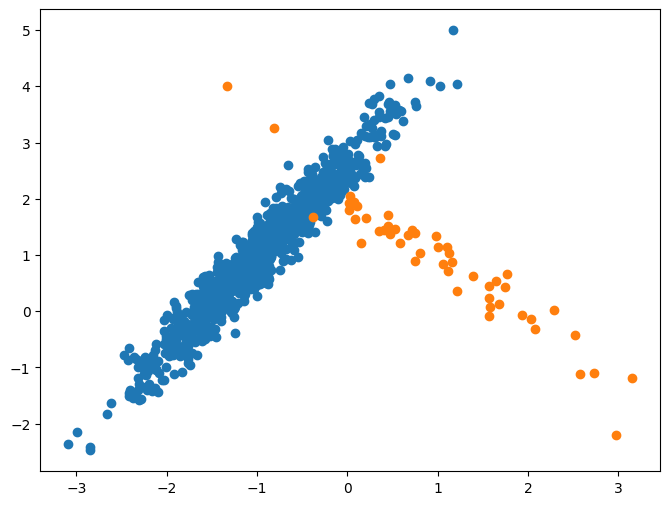

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.95, 0.05], flip_y=0, random_state=42)
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1])
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1])
plt.show()

In [18]:
class_counts = Counter(y)
print(f"Original class distribution: {class_counts}")

Original class distribution: Counter({0: 950, 1: 50})


In [19]:
smote = SMOTE(sampling_strategy=0.25, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [20]:
oversampled_counts = Counter(y_resampled)
print(f"Class distribution after SMOTE: {oversampled_counts}")

Class distribution after SMOTE: Counter({0: 950, 1: 237})


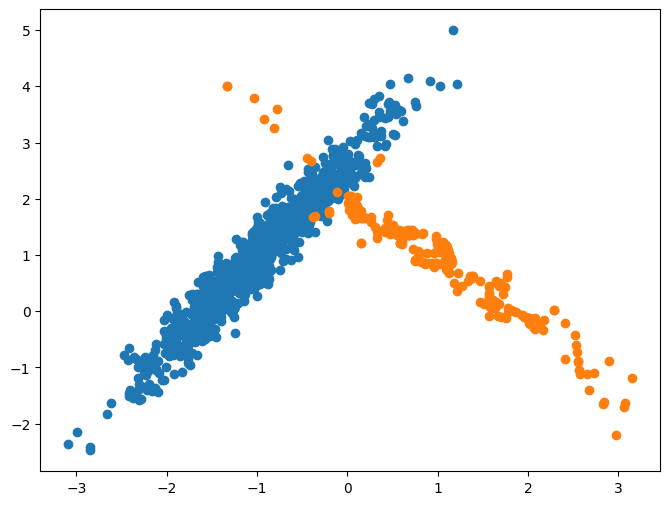

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(X_resampled[y_resampled == 0][:, 0], X_resampled[y_resampled == 0][:, 1])
plt.scatter(X_resampled[y_resampled == 1][:, 0], X_resampled[y_resampled == 1][:, 1])
plt.show()

In [22]:
undersampler = RandomUnderSampler(sampling_strategy=0.6, random_state=42)  # 3 times the minority class (0.6 = 3/5)
X_resampled, y_resampled = undersampler.fit_resample(X_resampled, y_resampled)

In [23]:
undersampled_counts = Counter(y_resampled)
print(f"Class distribution after undersampling: {undersampled_counts}")

Class distribution after undersampling: Counter({0: 395, 1: 237})


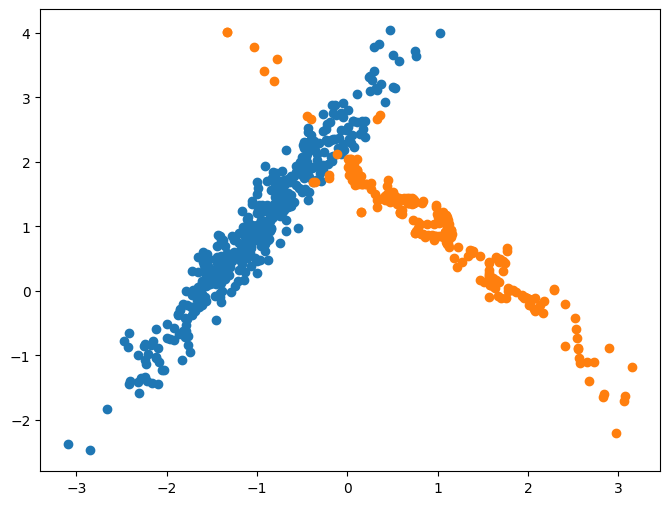

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(X_resampled[y_resampled == 0][:, 0], X_resampled[y_resampled == 0][:, 1])
plt.scatter(X_resampled[y_resampled == 1][:, 0], X_resampled[y_resampled == 1][:, 1])
plt.show()